In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

#Displaying all columns
pd.set_option('display.max_columns',None)

In [2]:
#loading data file
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

#display top of dataset
data.head()



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#Display the shape of dataset 
data.shape
print('The data set has ',data.shape[0],'rows and ',data.shape[1],'columns.')

The data set has  1000 rows and  40 columns.


In [4]:
print('\nData Types of data set attributes---->')
data.dtypes


Data Types of data set attributes---->


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
obj_cols=[cols for cols in data.columns if data[cols].dtype == 'object']
print('Object type attributes are =',obj_cols,'\n')
print('-------------------------------------------------------------------------------------------------------------------')
int_cols=[cols for cols in data.columns if data[cols].dtype == 'int64']
print('\nInteger type attributes are =',int_cols)

Object type attributes are = ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'] 

-------------------------------------------------------------------------------------------------------------------

Integer type attributes are = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [6]:
#Checking for duplicate data
data.duplicated().sum()

0

In [7]:
print('Shape of attribute collision_type with ? :',data[data['collision_type']=='?'].shape,'\n')
print('Shape of attribute Proper_damage with ? :',data[data['property_damage']=='?'].shape,'\n')
print('Shape of attribute police_report_available with ? :',data[data['police_report_available']=='?'].shape)

Shape of attribute collision_type with ? : (178, 40) 

Shape of attribute Proper_damage with ? : (360, 40) 

Shape of attribute police_report_available with ? : (343, 40)


In [8]:
#replacing ? with np.nan
data['collision_type']=data['collision_type'].replace('?',np.nan)

data['property_damage']=data['property_damage'].replace('?',np.nan)

data['police_report_available']=data['police_report_available'].replace('?',np.nan)

In [9]:
## Now checking for null values
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
#replacing null values for collision_type with mode
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])

#replacing null values for property_damage with mode
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

#replacing null values for police_report_available with mode
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [11]:
#replacing Y and N of attribute fraud_reported to 1 and 0 respectively
data.fraud_reported=data.fraud_reported.map({'Y':1 ,'N':0})

In [12]:
#Checking for null values after filling null values

print('Missing values after filling null values--->')
data.isnull().sum()

Missing values after filling null values--->


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [13]:
## Checking for unique values of each attributes:

print('No. of Unique values in each attribute------')
data.apply(lambda x: len(x.unique()))

No. of Unique values in each attribute------


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [14]:
# Statistical summary
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


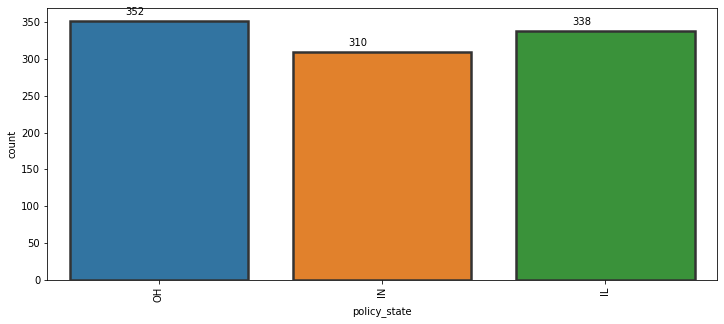

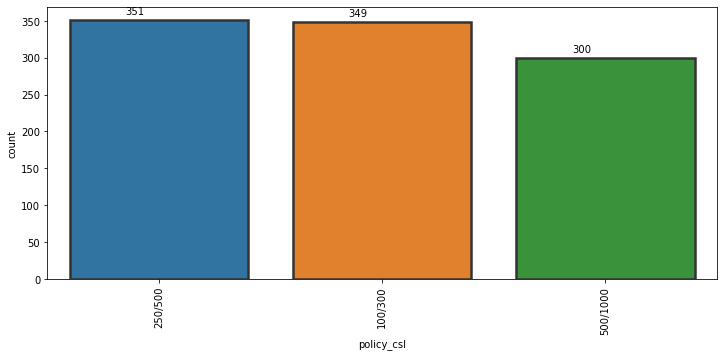

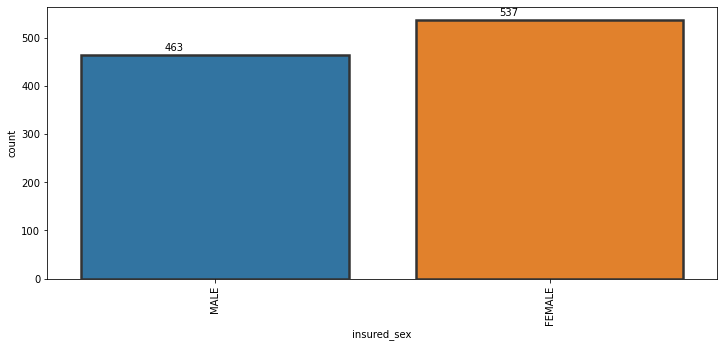

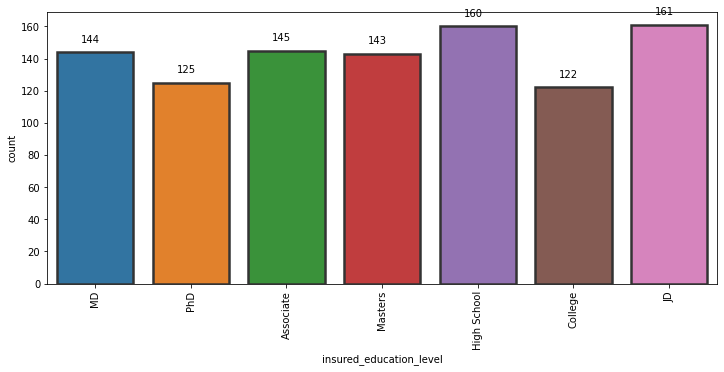

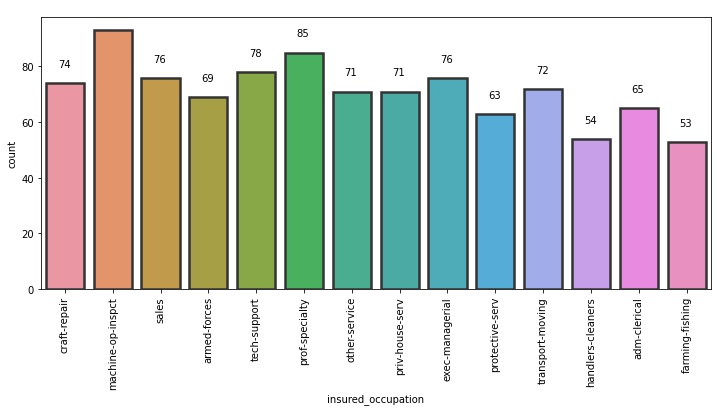

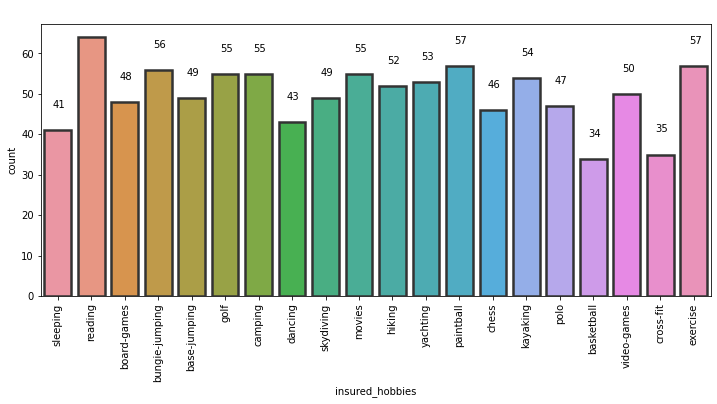

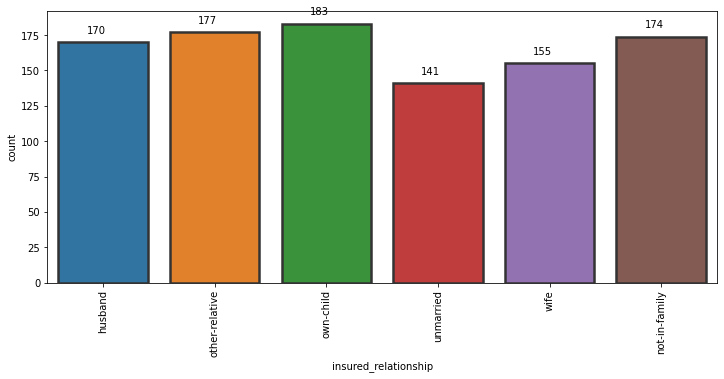

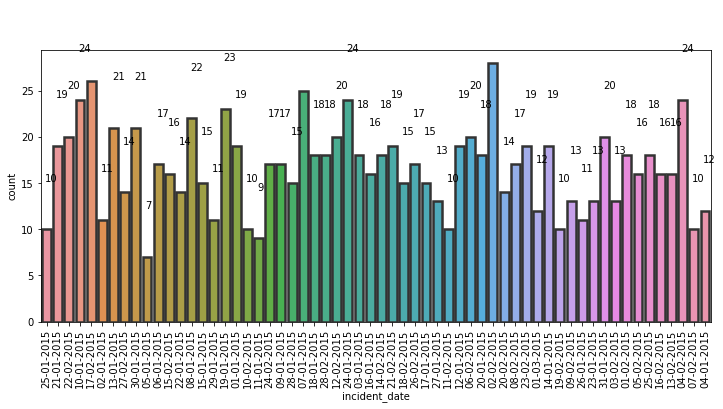

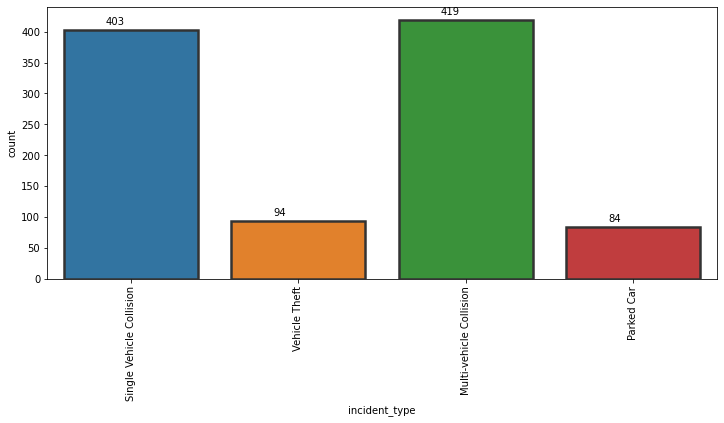

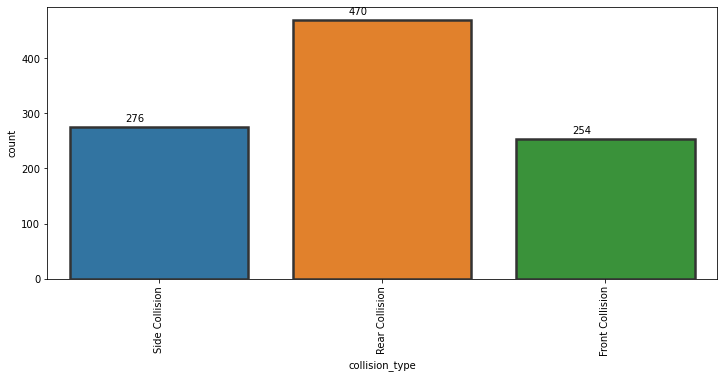

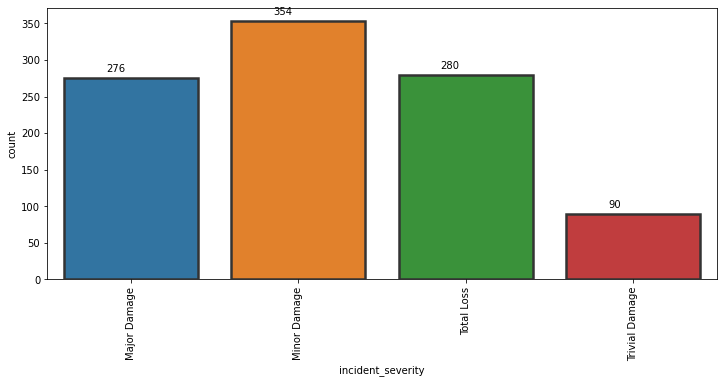

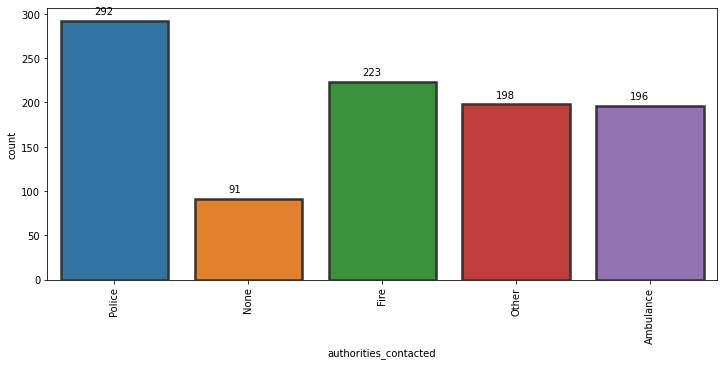

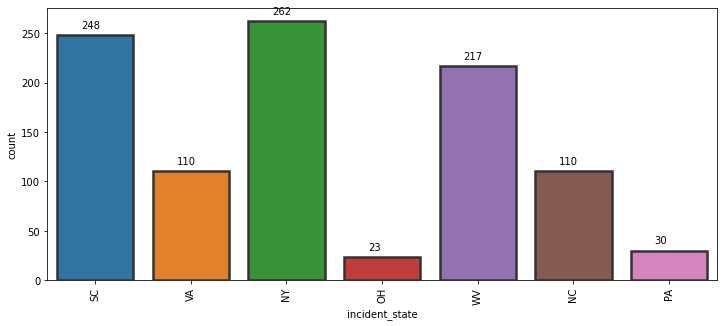

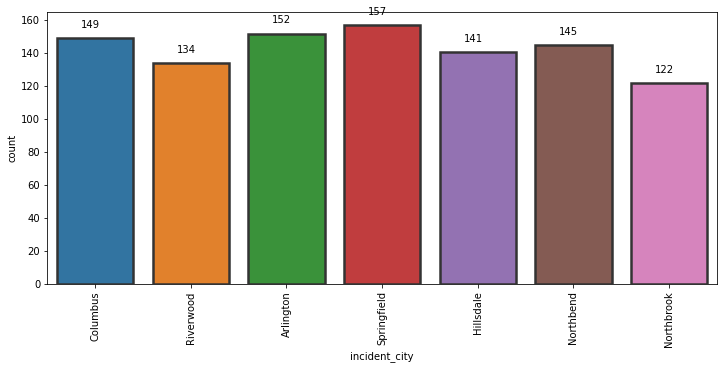

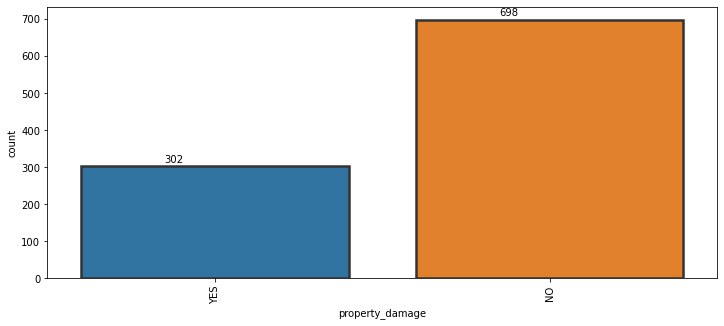

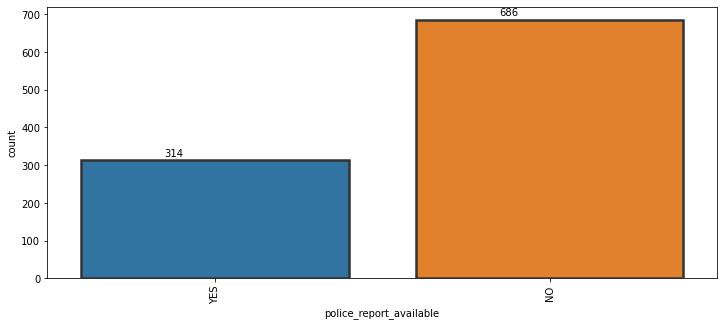

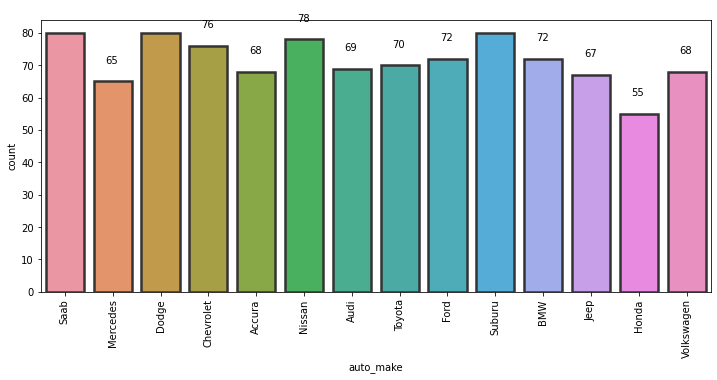

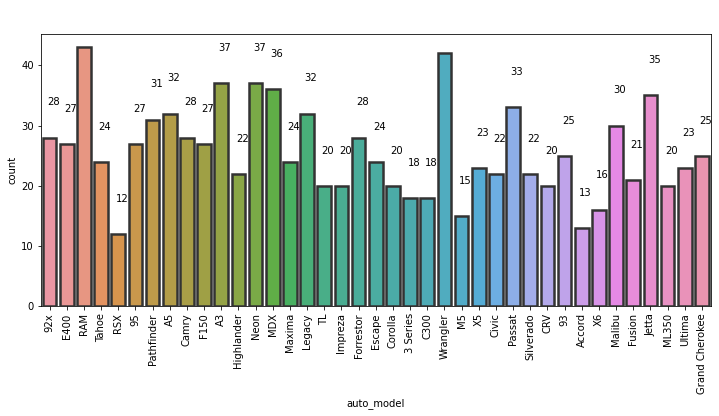

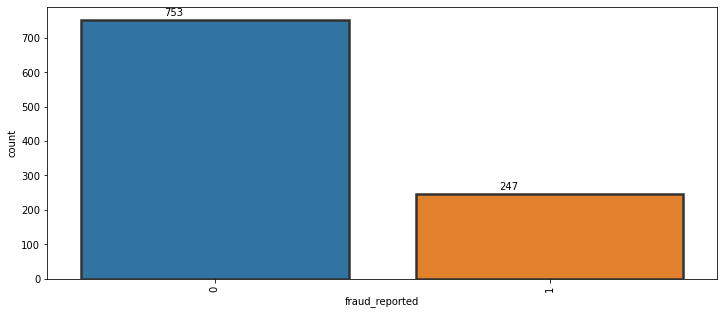

In [15]:
## Visulaization of catagorical data:
Obj_cols= ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
           'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 
           'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 
           'incident_city', 'property_damage', 'police_report_available', 'auto_make', 
            'auto_model', 'fraud_reported'] 


for i in Obj_cols:
    plt.figure(figsize=(12,5))
    ax=sns.countplot(data[i],edgecolor=".2",linewidth=2.5)
    plt.xticks(rotation=90)
    for j in ax.patches:
        ax.annotate(int(j.get_height()),(j.get_x()+0.25,j.get_height()+5), va='bottom',color='black')
    plt.show() 

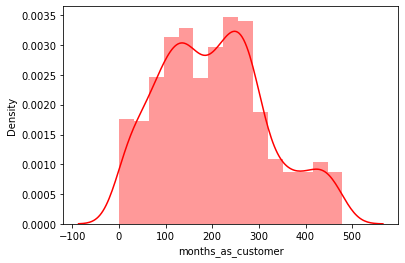

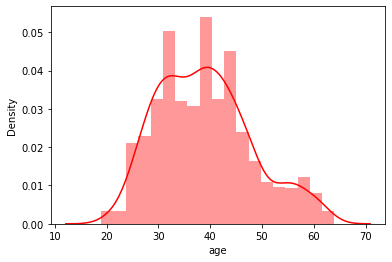

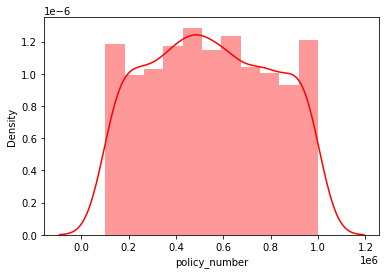

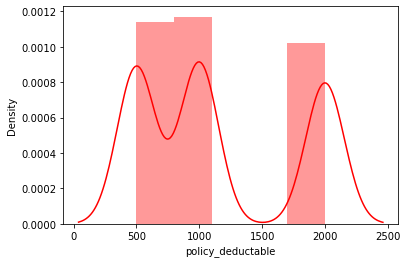

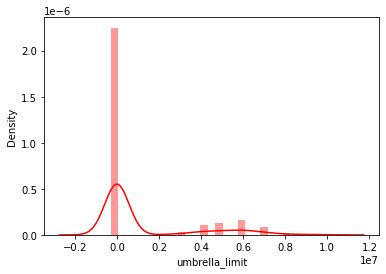

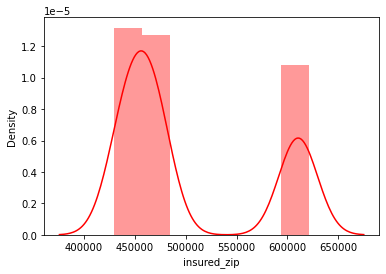

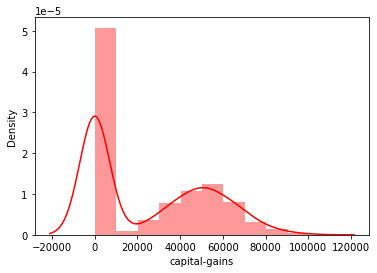

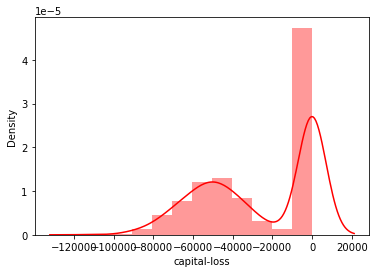

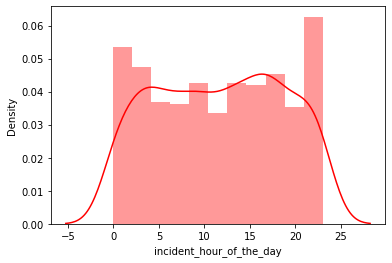

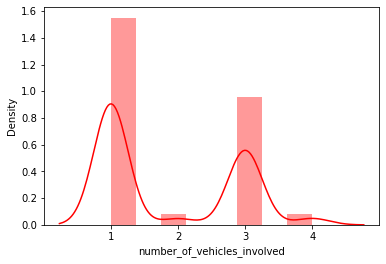

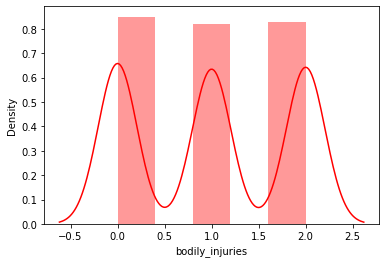

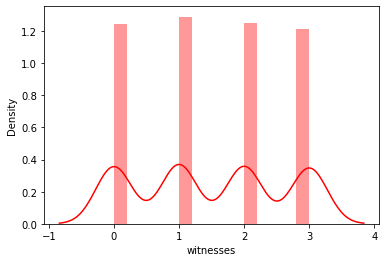

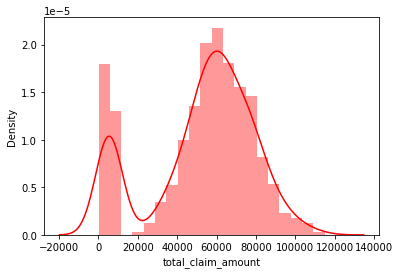

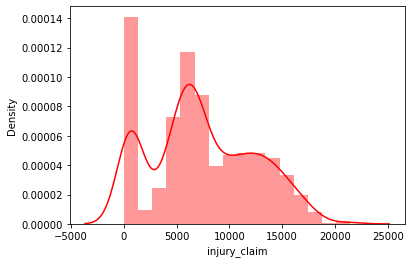

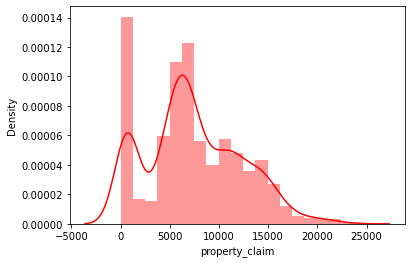

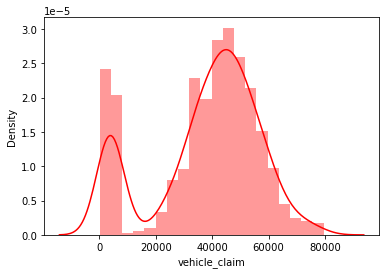

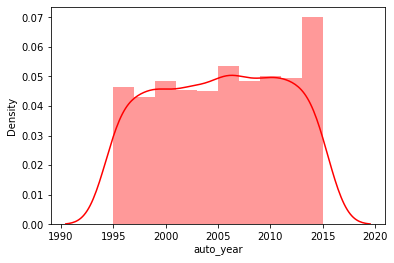

In [16]:
Int_cols = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 
           'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
           'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
           'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

for i in Int_cols:
    sns.distplot(data[i],kde=True,color='r')
    plt.show() 

In [17]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

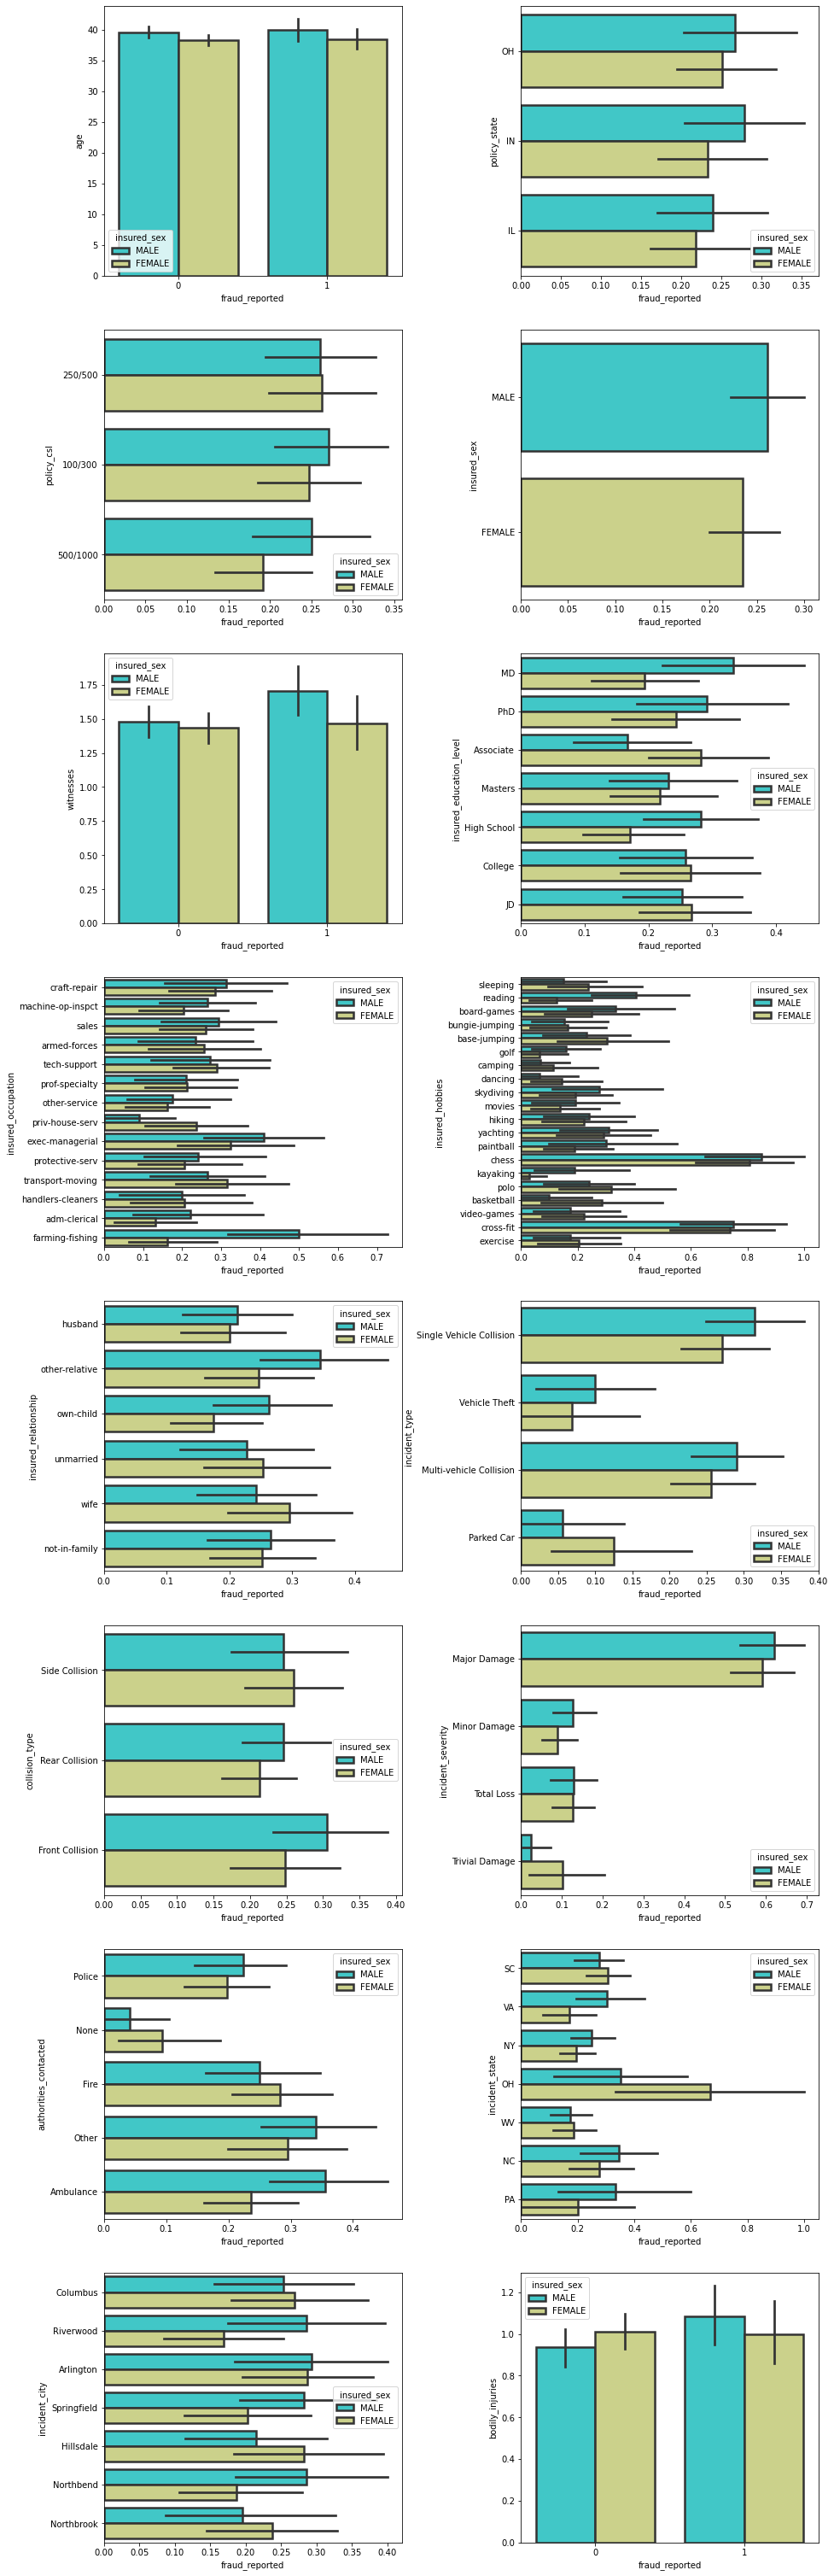

In [18]:
plt.figure(figsize=(15,30))
plt.subplot(8,2,1)
ax1=sns.barplot(y='age',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,2)
ax2=sns.barplot(y='policy_state',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,3)
ax3=sns.barplot(y='policy_csl',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,4)
ax4=sns.barplot(y='insured_sex',x='fraud_reported',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,5)
ax5=sns.barplot(y='witnesses',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,6)
ax=sns.barplot(y='insured_education_level',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
 
plt.subplot(8,2,7)
ax6=sns.barplot(y='insured_occupation',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,8)
ax7=sns.barplot(y='insured_hobbies',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)   
        
plt.subplot(8,2,9)
ax8=sns.barplot(y='insured_relationship',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)        
    
plt.subplot(8,2,10)
ax9=sns.barplot(y='incident_type',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)      
            
plt.subplot(8,2,11)
ax10=sns.barplot(y='collision_type',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5) 
    
plt.subplot(8,2,12)
ax11=sns.barplot(y='incident_severity',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
    
plt.subplot(8,2,13)
ax12=sns.barplot(y='authorities_contacted',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

   
plt.subplot(8,2,14)
ax13=sns.barplot(y='incident_state',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplot(8,2,15)
ax14=sns.barplot(y='incident_city',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
    
plt.subplot(8,2,16)
ax15=sns.barplot(y='bodily_injuries',x='fraud_reported',data=data,hue='insured_sex',palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)

plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 1.5)    
plt.show()

In [19]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

#applying label encoding to convert object type data to int type.
LE=LabelEncoder()
for i in obj_cols:
    data[i]=LE.fit_transform(data[i])

In [20]:
##Checking for correlation of output variable with other attributes:
corr_matrix=data.corr()

<AxesSubplot:>

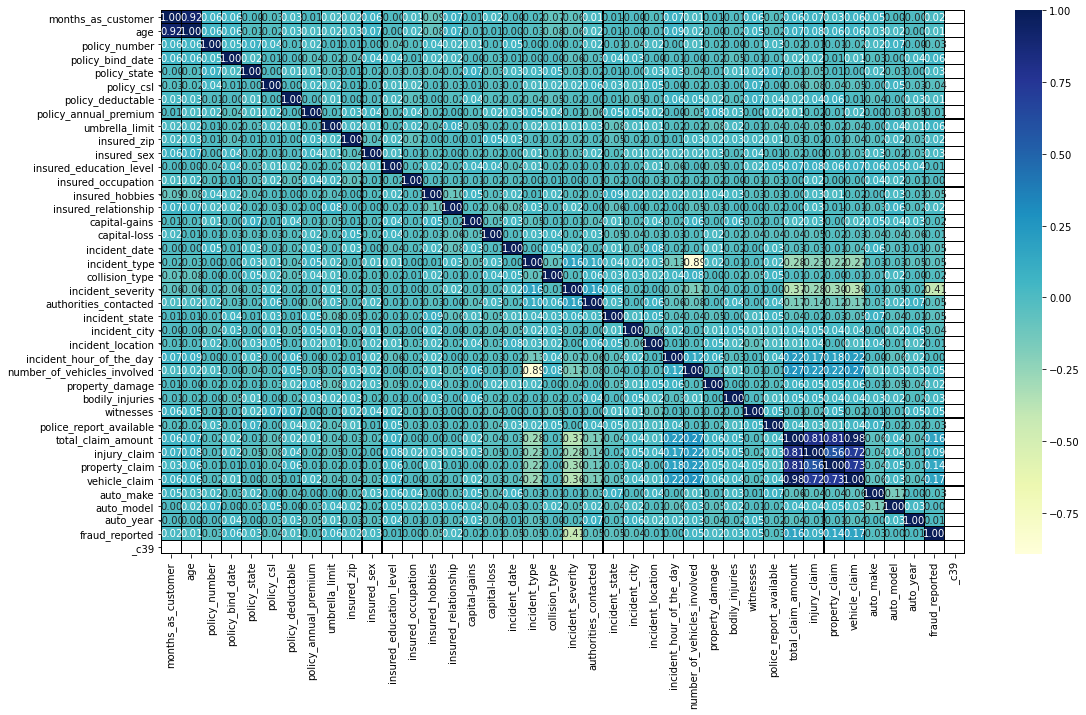

In [21]:
#Graphical Visualization of correlation 
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix,annot=True,linecolor='black',fmt='.2f',linewidths=0.1,cmap="YlGnBu")

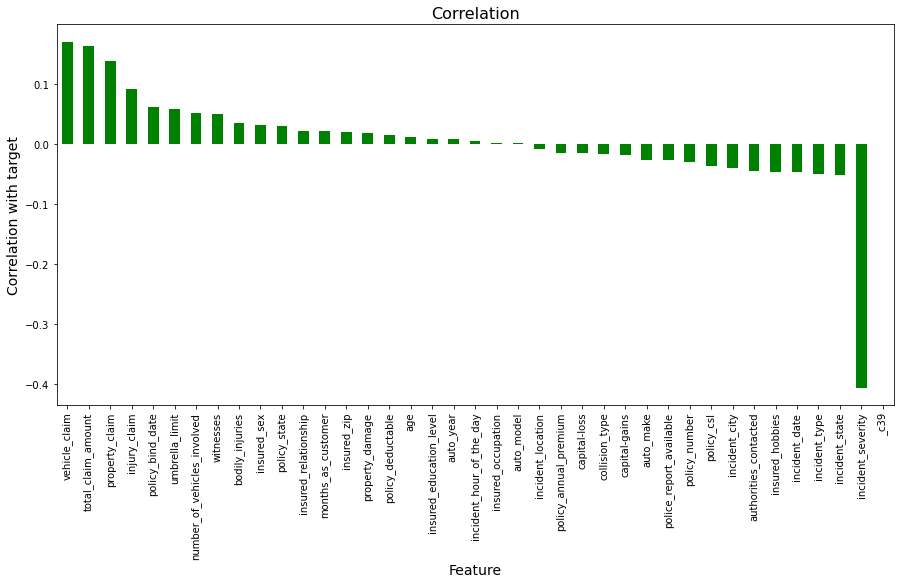

In [22]:
plt.figure(figsize=(15,7))
z=corr_matrix['fraud_reported'].sort_values(ascending=False)
z.drop(['fraud_reported']).plot(kind='bar',color='g')

plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with target',fontsize=14)
plt.title('Correlation',fontsize=16)
plt.show()

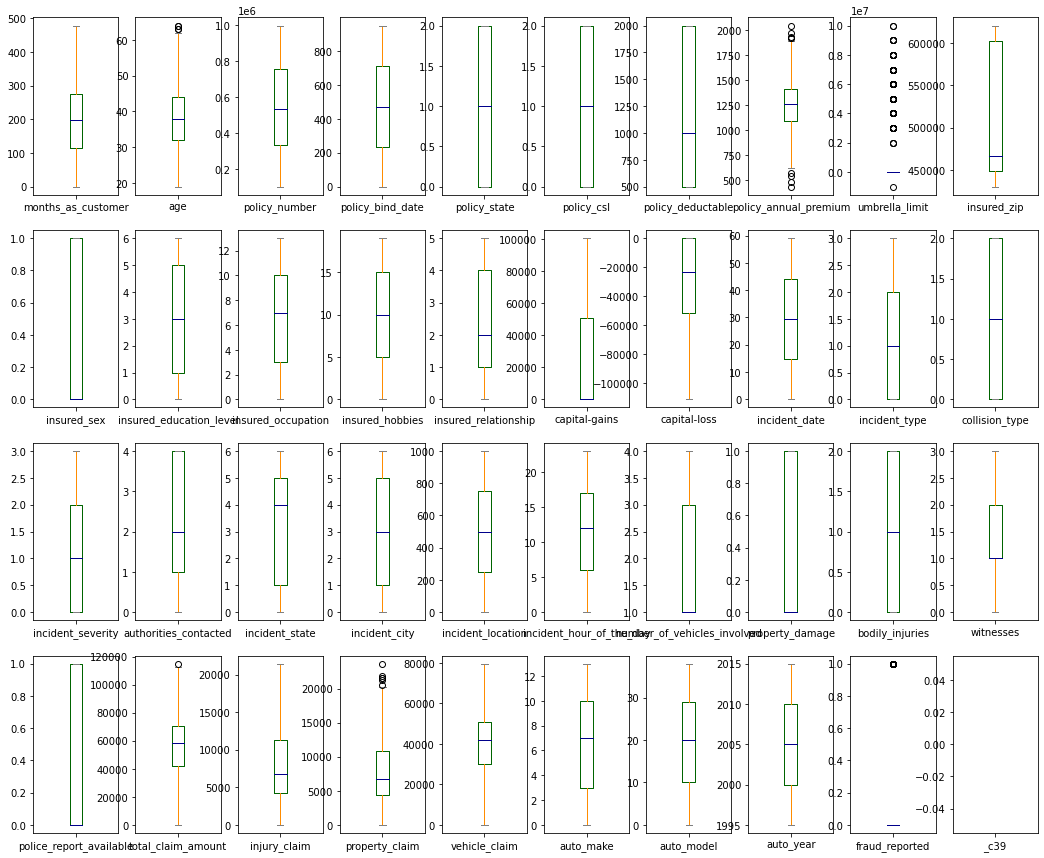

In [23]:
#Checking for outliers

color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

data.plot(kind='box',subplots=True,layout=(4,10),figsize=(18,15),color=color)
plt.show()

In [24]:
## Removing outliers

from numpy import percentile
data_new=data
data_new.shape
att_=att_ = ['policy_annual_premium','umbrella_limit','property_claim']
array=[None]*len(att_)
for x,i in enumerate(att_):
    q25,q75=percentile(data[i],25),percentile(data[i],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=q25-cut_off,q75+cut_off
    array[x]=[i,lower,upper]
    data_new[i]=data_new[i].apply(lambda x: lower if x<lower else (upper if x>upper else x))

In [25]:
data_new.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [26]:
#dropping variables which affect less on target variable.
data_new.drop(['_c39','policy_number'],inplace=True,axis=1)

In [27]:
#Splitting x and y variable
ds_x=data_new.drop(['fraud_reported'],axis=1) 
y=data_new['fraud_reported']

In [28]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(ds_x,y)

1    753
0    753
Name: fraud_reported, dtype: int64


<AxesSubplot:>

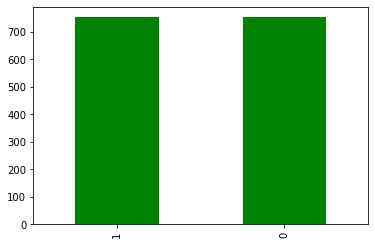

In [29]:
print(y_over.value_counts())
y_over.value_counts().plot(kind='bar',color='green')

In [30]:
#lets bring all features to a common scale

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(ds_x)



x=pd.DataFrame(x,columns=ds_x.columns)
x.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,0.684760,0.644444,0.560000,1.0,0.5,0.333333,0.618265,0.0,0.188769,1.0,0.666667,0.153846,0.894737,0.0,0.530348,1.000000,0.830508,0.666667,1.0,0.000000,1.0,0.666667,0.166667,0.996997,0.217391,0.000000,1.0,0.5,0.666667,1.0,0.622801,0.303497,0.633731,0.654296,0.769231,0.026316,0.45
1,0.475992,0.511111,0.864211,0.5,0.5,1.000000,0.457503,0.0,0.199478,1.0,0.666667,0.461538,0.789474,0.4,0.000000,1.000000,0.694915,1.000000,0.5,0.333333,1.0,0.833333,0.833333,0.628629,0.347826,0.000000,0.0,0.0,0.000000,0.0,0.043285,0.036364,0.037965,0.043276,0.615385,0.315789,0.60
2,0.279749,0.222222,0.195789,1.0,0.0,1.000000,0.623041,0.0,0.002766,0.0,1.000000,0.846154,0.105263,0.6,0.349254,1.000000,0.745763,0.000000,0.5,0.333333,1.0,0.166667,0.166667,0.685686,0.304348,0.666667,0.0,1.0,1.000000,0.0,0.300906,0.358974,0.187394,0.289722,0.307692,0.789474,0.60
3,0.534447,0.488889,0.806316,0.0,0.5,1.000000,0.625034,0.0,0.932699,0.0,1.000000,0.076923,0.105263,0.8,0.486567,0.438344,0.322034,0.666667,0.0,0.000000,1.0,0.333333,0.000000,0.669670,0.217391,0.000000,0.0,0.5,0.666667,0.0,0.551298,0.295571,0.308591,0.637187,0.230769,0.894737,0.95
4,0.475992,0.555556,0.190526,0.0,1.0,0.333333,0.753965,0.0,0.946264,1.0,0.000000,0.846154,0.105263,0.8,0.656716,0.585959,0.576271,1.000000,0.5,0.333333,0.5,0.166667,0.000000,0.220220,0.869565,0.000000,0.0,0.0,0.333333,0.0,0.055739,0.060606,0.031638,0.056359,0.000000,0.815789,0.70


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [32]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    dtc_Accu=accuracy_score(y_test,pred_test)
    if dtc_Accu>maxAccu:
        maxAccu=dtc_Accu
        maxRS=i
print('Best Accuracy is : ',maxAccu*100,'on random state :' ,maxRS)

Best Accuracy is :  84.7345132743363 on random state : 63


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=49)

In [34]:
print('Shape of dataset :',data.shape)
print('Shape of x_over:',x_over.shape)
print('Shape of y_over:',y_over.shape)
print('Shape of input - training set :', x_train.shape)
print('Shape of output - training set :', y_train.shape)
print('Shape of input - testing set :', x_test.shape)
print('Shape of output - testing set :', y_test.shape)

Shape of dataset : (1000, 38)
Shape of x_over: (1506, 37)
Shape of y_over: (1506,)
Shape of input - training set : (1054, 37)
Shape of output - training set : (1054,)
Shape of input - testing set : (452, 37)
Shape of output - testing set : (452,)


In [35]:
models = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Extratrees :',ExtraTreesClassifier()],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors = 2)],
               ['LinearSVC :', LinearSVC(random_state=0, tol=1e-5)],
               ['NB :' , GaussianNB()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['Xgboost: ', XGBClassifier()]]

In [36]:
print("Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (accuracy_score(y_test, predictions))*100)

Accuracy Score----->


DecisionTree : 83.4070796460177
RandomForest : 87.83185840707965
Extratrees : 86.50442477876106
KNeighbours : 76.76991150442478
LinearSVC : 50.66371681415929
NB : 63.495575221238944
AdaBoostClassifier : 86.72566371681415
GradientBoostingClassifier:  88.71681415929203
[20:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  89.38053097345133


In [37]:
print("f1_score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (f1_score(y_test, predictions))*100)

f1_score----->


DecisionTree : 82.53275109170306
RandomForest : 88.64142538975501
Extratrees : 86.80089485458612
KNeighbours : 75.9725400457666
LinearSVC : 0.0
NB : 71.2041884816754
AdaBoostClassifier : 87.06896551724138
GradientBoostingClassifier:  88.98678414096916
[20:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  89.47368421052632


In [38]:
print("Confusion Matrix----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name,'\n', (confusion_matrix(y_test, predictions))*100)

Confusion Matrix----->


DecisionTree : 
 [[18500  4400]
 [ 3500 18800]]
RandomForest : 
 [[19900  3000]
 [ 2600 19700]]
Extratrees : 
 [[19400  3500]
 [ 3000 19300]]
KNeighbours : 
 [[18100  4800]
 [ 5700 16600]]
LinearSVC : 
 [[22900     0]
 [22300     0]]
NB : 
 [[ 8300 14600]
 [ 1900 20400]]
AdaBoostClassifier : 
 [[19000  3900]
 [ 2100 20200]]
GradientBoostingClassifier:  
 [[20000  2900]
 [ 2100 20200]]
[20:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  
 [[20000  2900]
 [ 1900 20400]]


In [39]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x_over,y_over,cv=5)
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean()*100,result.std())
    print(result)

Cross_val_scores:


DecisionTree : : 82.276518 (0.049184)
RandomForest : : 86.596114 (0.078488)
Extratrees : : 85.667642 (0.090996)
KNeighbours : : 76.163781 (0.023796)
LinearSVC : : 50.066005 (0.003247)
NB : : 61.688412 (0.025050)
AdaBoostClassifier : : 82.282018 (0.099850)
GradientBoostingClassifier:  : 84.868540 (0.066735)
[20:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:49] WARNING: C:/Users/Administrator/workspace

In [40]:
### Performing Hyper parameter tuning to increse model performance of XGBoostclassifier.

            
param_tuning = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
             }
#Create new XGB object
XG_2 = XGBClassifier()

#Use GridsearchCV
GCV = GridSearchCV(estimator = XG_2,param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)

#Fit the model
best_model = GCV.fit(x_over,y_over)

#checking for best parameters
GCV.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[20:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.6,
 'gamma': 1,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 1.0}

In [41]:
#Creating Final Model after hyperparameter tuning for XGBRegressor

f_mod_xgb= XGBClassifier(
        colsample_bytree = 1.0,
        max_depth = 4,
        min_child_weight = 1,
        subsample = 1.0,
        gamma=0.5)


f_mod_xgb.fit(x_train, y_train)

y_pred = f_mod_xgb.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for XGBoost Classifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_xgb, x_over, y_over, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

[20:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       229
           1       0.88      0.91      0.90       223

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[202  27]
 [ 20 203]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for XGBoost Classifier is : 0.8960176991150443
---

### After hyper parameter tuning, model accuracy is 86.13%

AUC-ROC score of XGBoost Classifier: 0.8962049856071436
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


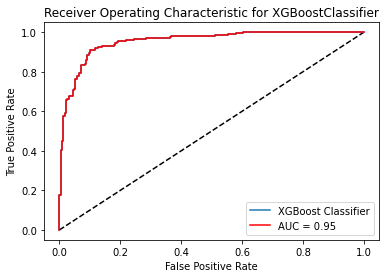

In [44]:
## Checking fro AUC-ROC Score

y_prob=f_mod_xgb.predict_proba(x_test)[:,1] 
pred=f_mod_xgb.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of XGBoost Classifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for XGBoostClassifier')
plt.show()

### AUC score of model is 95%

In [45]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_xgb,'insurance_fraud_detection_xgb.obj')

['insurance_fraud_detection_xgb.obj']